Project - 3

This data was extracted from the census bureau database found at

http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.

#####  Number of Instances
   48842 instances, mix of continuous and discrete    (train=32561, test=16281)
   45222 if instances with unknown values are removed (train=30162, test=15060)
   Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

#####  Number of Attributes 
   6 continuous, 8 nominal attributes.

#####  Attribute Information: 

1. age: continuous 
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. class: >50K, <=50K

#####  Missing Attribute Values: 

   7% have missing values.

#####  Class Distribution: 

 Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
 Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. Conversion of original data as follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.

Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls. 

These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.


Problem 1:  Prediction task is to determine whether a person makes over 50K a year.
Problem 2:  Which factors are important
Problem 3:  Which algorithms are best for this dataset

Dataset Link : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
# Import Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, sep=' *, *', engine='python')
test_data  = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, sep=' *, *', engine='python', header = None)

In [3]:
pd.set_option('display.max_columns', None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'income_class']

In [4]:
train_data.columns = col_labels
test_data.columns = col_labels

In [5]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_class      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
train_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
income_class      16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [10]:
test_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


# Data Exploration

The plot of the distribution of each feature gives  better understanding what we have in our data. We draw the number of values for each category feature and the histogram of the values for each continuous feature.

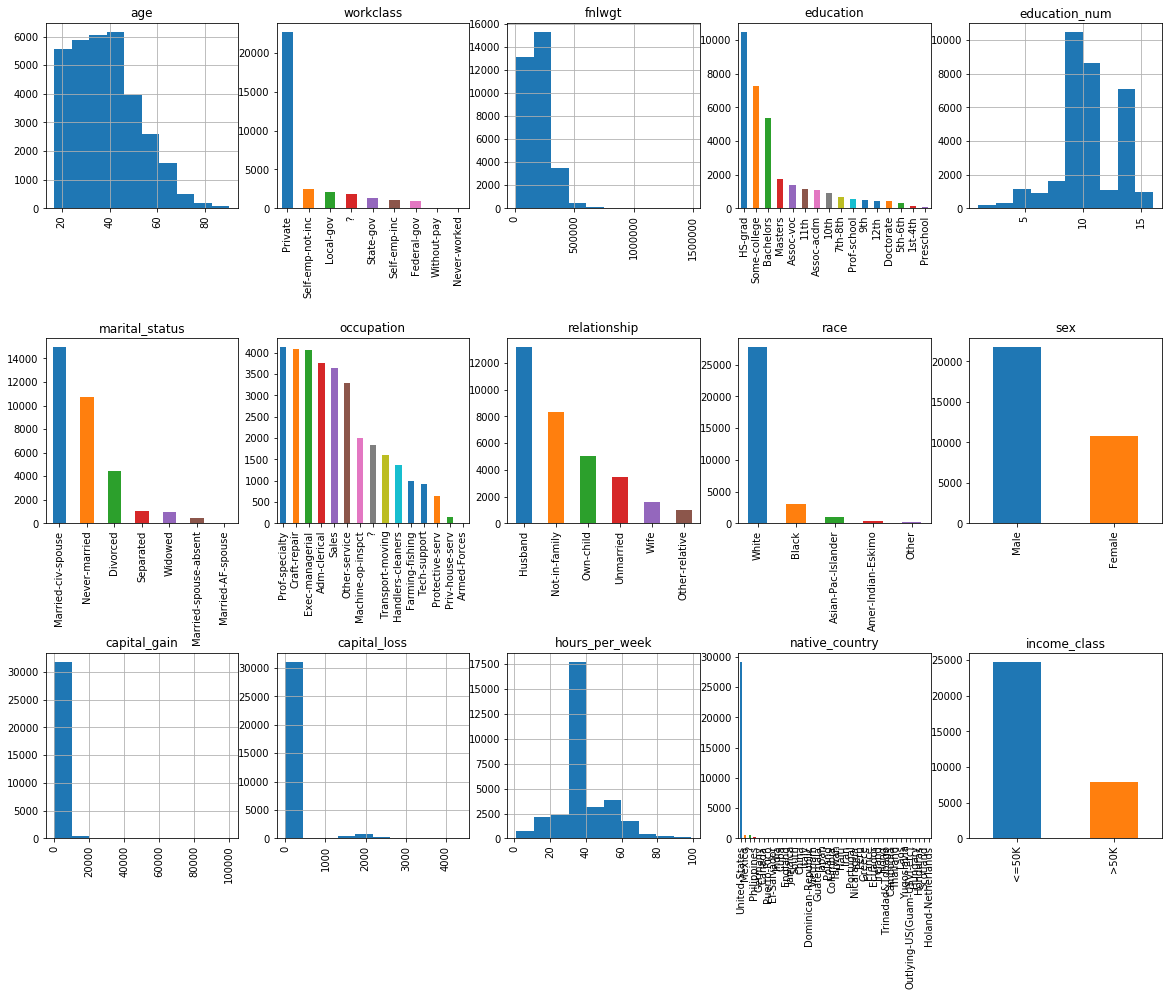

In [11]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = 3
for i, column in enumerate(train_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train_data.dtypes[column] == np.object:
        train_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

From the plots above that our data is mostly concentrated in the USA with mostly male and white colored

In [12]:
train_data.shape

(32561, 15)

In [13]:
test_data.shape

(16281, 15)

89% of the samples are for people from the US. Mexico comes next with less than 2%.

In [14]:
print('List of features in this file:\n', train_data.keys())#print features list

List of features in this file:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_class'],
      dtype='object')


In [15]:
#Feature : education and education_num both represent the same information across Training and Test dataset¶

In [16]:
train_data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [17]:
train_data.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [18]:
test_data.education.value_counts()

HS-grad         5283
Some-college    3587
Bachelors       2670
Masters          934
Assoc-voc        679
11th             637
Assoc-acdm       534
10th             456
7th-8th          309
Prof-school      258
9th              242
12th             224
Doctorate        181
5th-6th          176
1st-4th           79
Preschool         32
Name: education, dtype: int64

In [19]:
test_data.education_num.value_counts()

9     5283
10    3587
13    2670
14     934
11     679
7      637
12     534
6      456
4      309
15     258
5      242
8      224
16     181
3      176
2       79
1       32
Name: education_num, dtype: int64

Find Unique Values in columns

In [20]:
for column in train_data:
    if train_data.dtypes[column] == 'object':
        print(' ** Column :' ,column)
        print(train_data[column].unique())
        print("-------------------------------------------------------------------------")

 ** Column : workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
-------------------------------------------------------------------------
 ** Column : education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
-------------------------------------------------------------------------
 ** Column : marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
-------------------------------------------------------------------------
 ** Column : occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
---------------------------------

In [21]:
train_data=train_data.replace('?', 'Unknown') 
test_data=test_data.replace('?', 'Unknown') 

In [22]:
train_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [23]:
train_data = train_data.replace(to_replace = {'Local-gov', 'Federal-gov', 'State-gov'}, value = 'Govern-employ', regex = True)

In [24]:
train_data = train_data.replace(to_replace = {'Self-emp-inc', 'Self-emp-not-inc'}, value = 'Self-employ', regex = True)

In [25]:
train_data['workclass'].unique()

array(['Govern-employ', 'Self-employ', 'Private', 'Unknown',
       'Without-pay', 'Never-worked'], dtype=object)

In [26]:
test_data = test_data.replace(to_replace = {'Local-gov', 'Federal-gov', 'State-gov'}, value = 'Govern-employ', regex = True)
test_data = test_data.replace(to_replace = {'Self-emp-inc', 'Self-emp-not-inc'}, value = 'Self-employ', regex = True)

In [27]:
test_data['workclass'].unique()

array(['Private', 'Govern-employ', 'Unknown', 'Self-employ',
       'Without-pay', 'Never-worked'], dtype=object)

In [28]:
# Update Education

In [29]:
train_data = train_data.replace(to_replace = {'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'}, value = 'Primary-School', regex = True)
train_data = train_data.replace(to_replace = {'Doctorate', 'Assoc-voc' ,'Assoc-acdm', 'Prof-school'}, value = 'other', regex = True)

In [30]:
train_data['education'].unique()

array(['Bachelors', 'HS-grad', 'Primary-School', 'Masters',
       'Some-college', 'other'], dtype=object)

In [31]:
test_data = test_data.replace(to_replace = {'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'}, value = 'Primary-School', regex = True)
test_data = test_data.replace(to_replace = {'Doctorate', 'Assoc-voc' ,'Assoc-acdm', 'Prof-school'}, value = 'other', regex = True)

In [32]:
test_data['education'].unique()

array(['Primary-School', 'HS-grad', 'other', 'Some-college', 'Bachelors',
       'Masters'], dtype=object)

In [33]:
# Update marital_status

In [34]:
train_data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [35]:
train_data = train_data.replace(to_replace = {'Never-married', 'Separated', 'Widowed', 'Divorced', 'Married-spouse-absent'}, value = 'no-spouse', regex = True)
train_data = train_data.replace(to_replace = {'Married-AF-spouse', 'Married-civ-spouse'}, value = 'have-spouse', regex = True)

In [36]:
train_data['marital_status'].unique()

array(['no-spouse', 'have-spouse'], dtype=object)

In [37]:
test_data = test_data.replace(to_replace = {'Never-married', 'Separated', 'Widowed', 'Divorced', 'Married-spouse-absent'}, value = 'no-spouse', regex = True)
test_data = test_data.replace(to_replace = {'Married-AF-spouse', 'Married-civ-spouse'}, value = 'have-spouse', regex = True)

In [38]:
train_data['education'].unique()

array(['Bachelors', 'HS-grad', 'Primary-School', 'Masters',
       'Some-college', 'other'], dtype=object)

In [39]:
train_data['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [40]:
train_data['education'].value_counts()

HS-grad           10501
Some-college       7291
Bachelors          5355
Primary-School     4253
other              3438
Masters            1723
Name: education, dtype: int64

In [41]:
# there is a high correlation between Education and Education-Num. Let’s drop Education-Num column
train_data = train_data.drop(['education_num'],axis=1)
test_data = test_data.drop(['education_num'],axis=1)

In [42]:
# Let us check for native country and find out the unique values 

In [43]:
train_data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [44]:
#Prepare a dictionary to replace the Continents

In [45]:
categories_dict = {"United-States":"North America","Mexico":"North America","Unknown":"Unknown","Philippines":"Asia","Germany":"Europe","Canada":"North America","Puerto-Rico":"Central America","El-Salvador":"Central America","India":"Asia","Cuba":"Central America","England":"Europe","Jamaica":"Central America","South":"Asia","China":"Asia","Italy":"Europe","Dominican-Republic":"Central America","Vietnam":"Asia","Guatemala":"Central America","Japan":"Asia","Poland":"Europe","Columbia":"South America","Taiwan":"Asia","Haiti":"Central America","Iran":"Asia","Portugal":"Europe","Nicaragua":"Central America","Peru":"South America","Greece":"Europe","France":"Europe","Ecuador":"South America","Ireland":"Europe","Hong":"Asia","Cambodia":"Asia","Trinadad&Tobago":"Central America","Laos":"Asia","Thailand":"Asia","Yugoslavia":"Europe","Outlying-US(Guam-USVI-etc)":"North America","Honduras":"Central America","Hungary":"Europe","Scotland":"Europe","Holand-Netherlands":"Europe","?":"Unknown"}

In [46]:
train_data['Continent'] = train_data['native_country'].map(categories_dict)
test_data['Continent'] = test_data['native_country'].map(categories_dict)

In [47]:
train_data['Continent'].unique()

array(['North America', 'Central America', 'Asia', 'Unknown', 'Europe',
       'South America'], dtype=object)

In [48]:
test_data['Continent'].unique()

array(['North America', 'Unknown', 'South America', 'Central America',
       'Europe', 'Asia'], dtype=object)

In [49]:
train_data['Continent'].value_counts()

North America      29948
Asia                 751
Central America      640
Unknown              583
Europe               521
South America        118
Name: Continent, dtype: int64

In [50]:
train_data = train_data.drop(['native_country'],axis=1)
test_data = test_data.drop(['native_country'],axis=1)

In [51]:
#  update occupation by finding unique occupation and grouping them into Service,Tech,Physic-work,Business

In [52]:
train_data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [53]:
train_data = train_data.replace(to_replace = {'Other-service', 'Protective-serv', 'Priv-house-serv' }, value = 'Service', regex = True)
train_data = train_data.replace(to_replace = {'Machine-op-inspct', 'Tech-support', 'Armed-Forces'}, value = 'Tech', regex = True)
train_data = train_data.replace(to_replace = {'Craft-repair', 'Handlers-cleaners', 'Farming-fishing', 'Transport-moving' }, value = 'Physic-work', regex = True)
train_data = train_data.replace(to_replace = {'Adm-clerical', 'Exec-managerial', 'Sales'}, value = 'Business', regex = True)

In [54]:
train_data['occupation'].unique()

array(['Business', 'Physic-work', 'Prof-specialty', 'Service', 'Tech',
       'Unknown'], dtype=object)

In [55]:
test_data = test_data.replace(to_replace = {'Other-service', 'Protective-serv', 'Priv-house-serv' }, value = 'Service', regex = True)
test_data = test_data.replace(to_replace = {'Machine-op-inspct', 'Tech-support', 'Armed-Forces'}, value = 'Tech', regex = True)
test_data = test_data.replace(to_replace = {'Craft-repair', 'Handlers-cleaners', 'Farming-fishing', 'Transport-moving' }, value = 'Physic-work', regex = True)
test_data = test_data.replace(to_replace = {'Adm-clerical', 'Exec-managerial', 'Sales'}, value = 'Business', regex = True)

In [56]:
train_data.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_class,Continent
0,39,Govern-employ,77516,Bachelors,no-spouse,Business,Not-in-family,White,Male,2174,0,40,<=50K,North America
1,50,Self-employ,83311,Bachelors,have-spouse,Business,Husband,White,Male,0,0,13,<=50K,North America
2,38,Private,215646,HS-grad,no-spouse,Physic-work,Not-in-family,White,Male,0,0,40,<=50K,North America
3,53,Private,234721,Primary-School,have-spouse,Physic-work,Husband,Black,Male,0,0,40,<=50K,North America
4,28,Private,338409,Bachelors,have-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,Central America


In [57]:
test_data.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_class,Continent
0,25,Private,226802,Primary-School,no-spouse,Tech,Own-child,Black,Male,0,0,40,<=50K.,North America
1,38,Private,89814,HS-grad,have-spouse,Physic-work,Husband,White,Male,0,0,50,<=50K.,North America
2,28,Govern-employ,336951,other,have-spouse,Service,Husband,White,Male,0,0,40,>50K.,North America
3,44,Private,160323,Some-college,have-spouse,Tech,Husband,Black,Male,7688,0,40,>50K.,North America
4,18,Unknown,103497,Some-college,no-spouse,Unknown,Own-child,White,Female,0,0,30,<=50K.,North America


In [58]:
train_data = pd.get_dummies(train_data,columns=['workclass','education','marital_status','occupation','relationship','race','sex','Continent'],drop_first=True)
test_data = pd.get_dummies(test_data,columns=['workclass','education','marital_status','occupation','relationship','race','sex','Continent'],drop_first=True)

In [59]:
# Test Data

In [60]:
for column in test_data:
    if test_data.dtypes[column] == 'object':
        print(' ** Column :' ,column)
        print(test_data[column].unique())
        print("-------------------------------------------------------------------------")

 ** Column : income_class
['<=50K.' '>50K.']
-------------------------------------------------------------------------


In [61]:
test_data=test_data.replace('?', 'Unknown') 

In [62]:
# Discretise Age into bins 'very_low','low','high','very_high

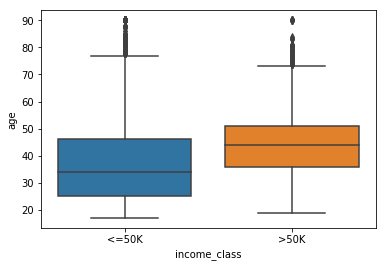

In [63]:
sns.boxplot(x=train_data["income_class"], y=train_data["age"])

In [64]:
pd.qcut(train_data["age"], 4).value_counts()

(16.999, 28.0]    8898
(37.0, 48.0]      8241
(28.0, 37.0]      7783
(48.0, 90.0]      7639
Name: age, dtype: int64

In [65]:
train_data['Age_Bin']=pd.qcut(train_data.age, 4, labels=['very_low','low','high','very_high'])

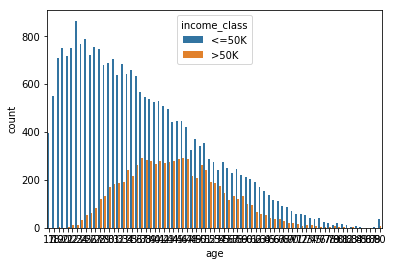

In [66]:
sns.countplot(x="age", data=train_data, hue="income_class")

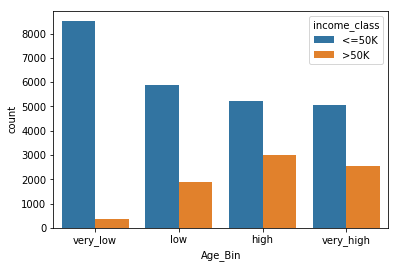

In [67]:
sns.countplot(x="Age_Bin", data=train_data, hue="income_class")

In [68]:
train_data = train_data.drop(['age'],axis=1)

In [69]:
# discretise Fnlwgt into 'low','medium','high'

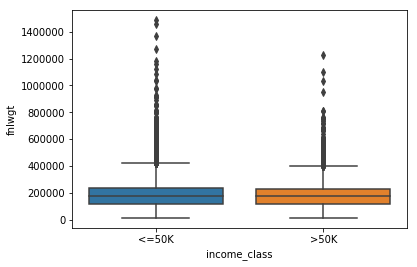

In [70]:
sns.boxplot(x=train_data["income_class"], y=train_data["fnlwgt"])

In [71]:
pd.qcut(train_data["fnlwgt"], 3).value_counts()

(141067.0, 210474.0]     10854
(12284.999, 141067.0]    10854
(210474.0, 1484705.0]    10853
Name: fnlwgt, dtype: int64

In [72]:
train_data['FnlWgt_Bin']=pd.qcut(train_data.fnlwgt, 3, labels=['low','medium','high'])

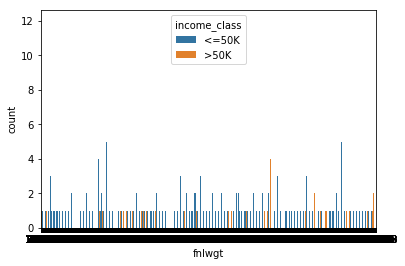

In [73]:
sns.countplot(x="fnlwgt", data=train_data, hue="income_class")

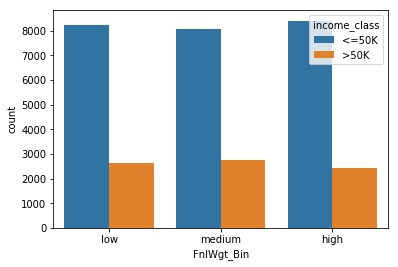

In [74]:
sns.countplot(x="FnlWgt_Bin", data=train_data, hue="income_class")

In [75]:
train_data.head()

,fnlwgt,capital_gain,capital_loss,hours_per_week,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin
0,77516,2174,0,40,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low
1,83311,0,0,13,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_high,low
2,215646,0,0,40,<=50K,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,high
3,234721,0,0,40,<=50K,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,very_high,high
4,338409,0,0,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,very_low,high


In [76]:
train_data = train_data.drop(['fnlwgt'],axis=1)

In [77]:
# discretise capital_gain 'low','high'

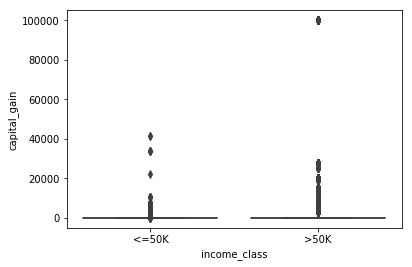

In [78]:
sns.boxplot(x=train_data["income_class"], y=train_data["capital_gain"])

In [79]:
train_data['capital_gain_rank'] = train_data['capital_gain'].rank(method='first')

In [80]:
pd.qcut(train_data["capital_gain_rank"], 2).value_counts()

(0.999, 16281.0]      16281
(16281.0, 32561.0]    16280
Name: capital_gain_rank, dtype: int64

In [81]:
train_data['Capital_Gain_Bin']=pd.qcut(train_data.capital_gain_rank, 2, labels=['low','high'])

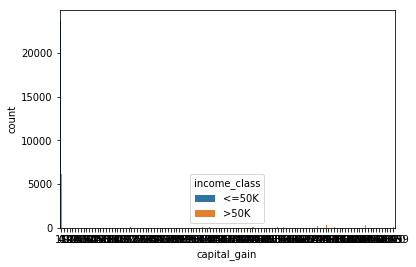

In [82]:
sns.countplot(x="capital_gain", data=train_data, hue="income_class")

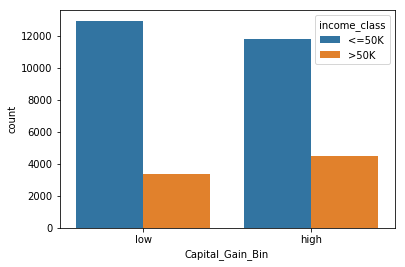

In [83]:
sns.countplot(x="Capital_Gain_Bin", data=train_data, hue="income_class")

In [84]:
train_data = train_data.drop(['capital_gain'],axis=1)
train_data = train_data.drop(['capital_gain_rank'],axis=1)

In [85]:
train_data.head()

,capital_loss,hours_per_week,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin
0,0,40,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,high
1,0,13,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_high,low,low
2,0,40,<=50K,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,high,low
3,0,40,<=50K,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,very_high,high,low
4,0,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,very_low,high,low


In [86]:
# discretise capital_loss 'low','high'

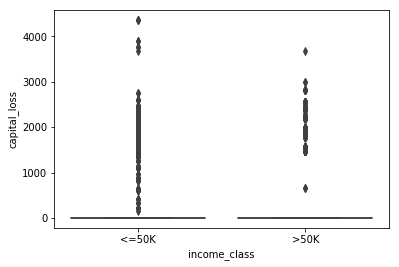

In [87]:
sns.boxplot(x=train_data["income_class"], y=train_data["capital_loss"])

In [88]:
train_data['capital_loss_rank'] = train_data['capital_loss'].rank(method='first')

In [89]:
pd.qcut(train_data["capital_loss_rank"], 2).value_counts()

(0.999, 16281.0]      16281
(16281.0, 32561.0]    16280
Name: capital_loss_rank, dtype: int64

In [90]:
train_data['Capital_Loss_Bin']=pd.qcut(train_data.capital_loss_rank, 2, labels=['low','high'])

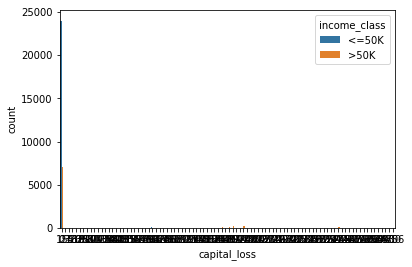

In [91]:
sns.countplot(x="capital_loss", data=train_data, hue="income_class")

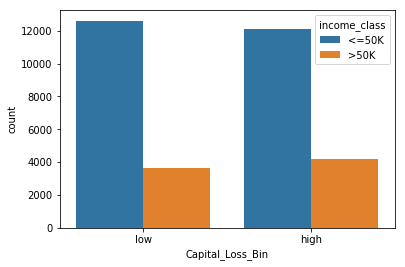

In [92]:
sns.countplot(x="Capital_Loss_Bin", data=train_data, hue="income_class")

In [93]:
train_data.head()

,capital_loss,hours_per_week,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,capital_loss_rank,Capital_Loss_Bin
0,0,40,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,high,1.0,low
1,0,13,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_high,low,low,2.0,low
2,0,40,<=50K,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,high,low,3.0,low
3,0,40,<=50K,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,very_high,high,low,4.0,low
4,0,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,very_low,high,low,5.0,low


In [94]:
train_data = train_data.drop(['capital_loss'],axis=1)
train_data = train_data.drop(['capital_loss_rank'],axis=1)

In [95]:
# Discretise hours_per_week - low,normal, hard,v hard

In [96]:
#train_data["hours_per_week"]

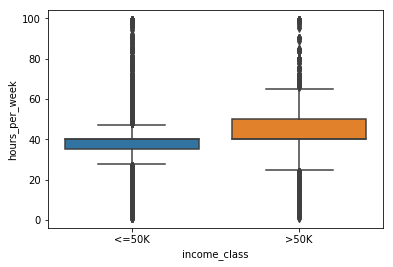

In [97]:
sns.boxplot(x=train_data["income_class"], y=train_data["hours_per_week"])

In [98]:
train_data['hours_per_week_rank'] = train_data['hours_per_week'].rank(method='first')

In [99]:
pd.qcut(train_data["hours_per_week"], 2).value_counts()

(0.999, 40.0]    22980
(40.0, 99.0]      9581
Name: hours_per_week, dtype: int64

In [100]:
 train_data['hours_per_week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [101]:
hpw = train_data['hours_per_week']

In [102]:
train_data['Hours_per_week_Bin'] = list(map(lambda hpw:"low" if(hpw<=35) else "normal" if (hpw>35 and hpw<=45) else "hard" if (hpw>45 and hpw<=60) else "very hard", hpw))

In [103]:
train_data['Hours_per_week_Bin'].unique()

array(['normal', 'low', 'hard', 'very hard'], dtype=object)

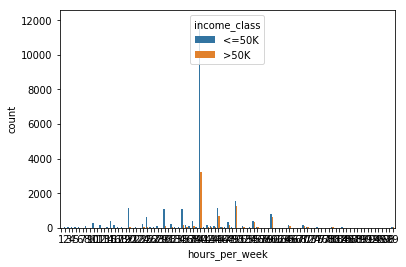

In [104]:
sns.countplot(x="hours_per_week", data=train_data, hue="income_class")

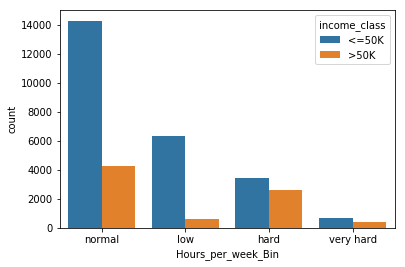

In [105]:
sns.countplot(x="Hours_per_week_Bin", data=train_data, hue="income_class")

In [106]:
train_data.head()

,hours_per_week,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,Capital_Loss_Bin,hours_per_week_rank,Hours_per_week_Bin
0,40,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,high,low,7764.0,normal
1,13,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_high,low,low,low,921.0,low
2,40,<=50K,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,high,low,low,7765.0,normal
3,40,<=50K,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,very_high,high,low,low,7766.0,normal
4,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,very_low,high,low,low,7767.0,normal


In [107]:
train_data = train_data.drop(['hours_per_week'],axis=1)

In [108]:
train_data = train_data.drop(['hours_per_week_rank'],axis=1)

In [109]:
train_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,Capital_Loss_Bin,Hours_per_week_Bin
0,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,high,low,normal
1,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_high,low,low,low,low
2,<=50K,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,high,low,low,normal
3,<=50K,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,very_high,high,low,low,normal
4,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,very_low,high,low,low,normal


In [110]:
#Discretize Test Data

In [111]:
test_data['Age_Bin']=pd.qcut(test_data.age, 4, labels=['very_low','low','high','very_high'])

test_data = test_data.drop(['age'],axis=1)

test_data['FnlWgt_Bin']=pd.qcut(test_data.fnlwgt, 3, labels=['low','medium','high'])

test_data = test_data.drop(['fnlwgt'],axis=1)

In [112]:
test_data['capital_gain_rank'] = test_data['capital_gain'].rank(method='first')
pd.qcut(test_data["capital_gain_rank"], 2).value_counts()
test_data['Capital_Gain_Bin']=pd.qcut(test_data.capital_gain_rank, 2, labels=['low','high'])

test_data= test_data.drop(['capital_gain'],axis=1)
test_data= test_data.drop(['capital_gain_rank'],axis=1)

In [113]:

test_data['capital_loss_rank'] = test_data['capital_loss'].rank(method='first')
test_data['Capital_Loss_Bin']=pd.qcut(test_data.capital_loss_rank, 2, labels=['low','high'])

test_data = test_data.drop(['capital_loss'],axis=1)
test_data = test_data.drop(['capital_loss_rank'],axis=1)


hpw = test_data ['hours_per_week']
test_data ['Hours_per_week_Bin'] = list(map(lambda hpw:"low" if(hpw<=35) else "normal" if (hpw>35 and hpw<=45) else "hard" if (hpw>45 and hpw<=60) else "very hard", hpw))


In [114]:
test_data= test_data.drop(['hours_per_week'],axis=1)

In [115]:
test_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,Capital_Loss_Bin,Hours_per_week_Bin
0,<=50K.,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,very_low,high,low,low,normal
1,<=50K.,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,low,low,hard
2,>50K.,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_low,high,low,low,normal
3,>50K.,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,high,medium,high,low,normal
4,<=50K.,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,very_low,low,low,low,low


In [116]:
def heatMap( df, mirror):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(30, 30))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
    if mirror == True:
       #Generate Heat Map, allow annotations and place floats in map
       sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
       #Apply xticks
       plt.xticks(range(len(corr.columns)), corr.columns);
       #Apply yticks
       plt.yticks(range(len(corr.columns)), corr.columns)
       #show plot

    else:
       # Drop self-correlations
       dropSelf = np.zeros_like(corr)
       dropSelf[np.triu_indices_from(dropSelf)] = True# Generate Color Map
       colormap = sns.diverging_palette(220, 10, as_cmap=True)
       # Generate Heat Map, allow annotations and place floats in map
       sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
       # Apply xticks
       plt.xticks(range(len(corr.columns)), corr.columns);
       # Apply yticks
       plt.yticks(range(len(corr.columns)), corr.columns)
    # show plot
    plt.show()

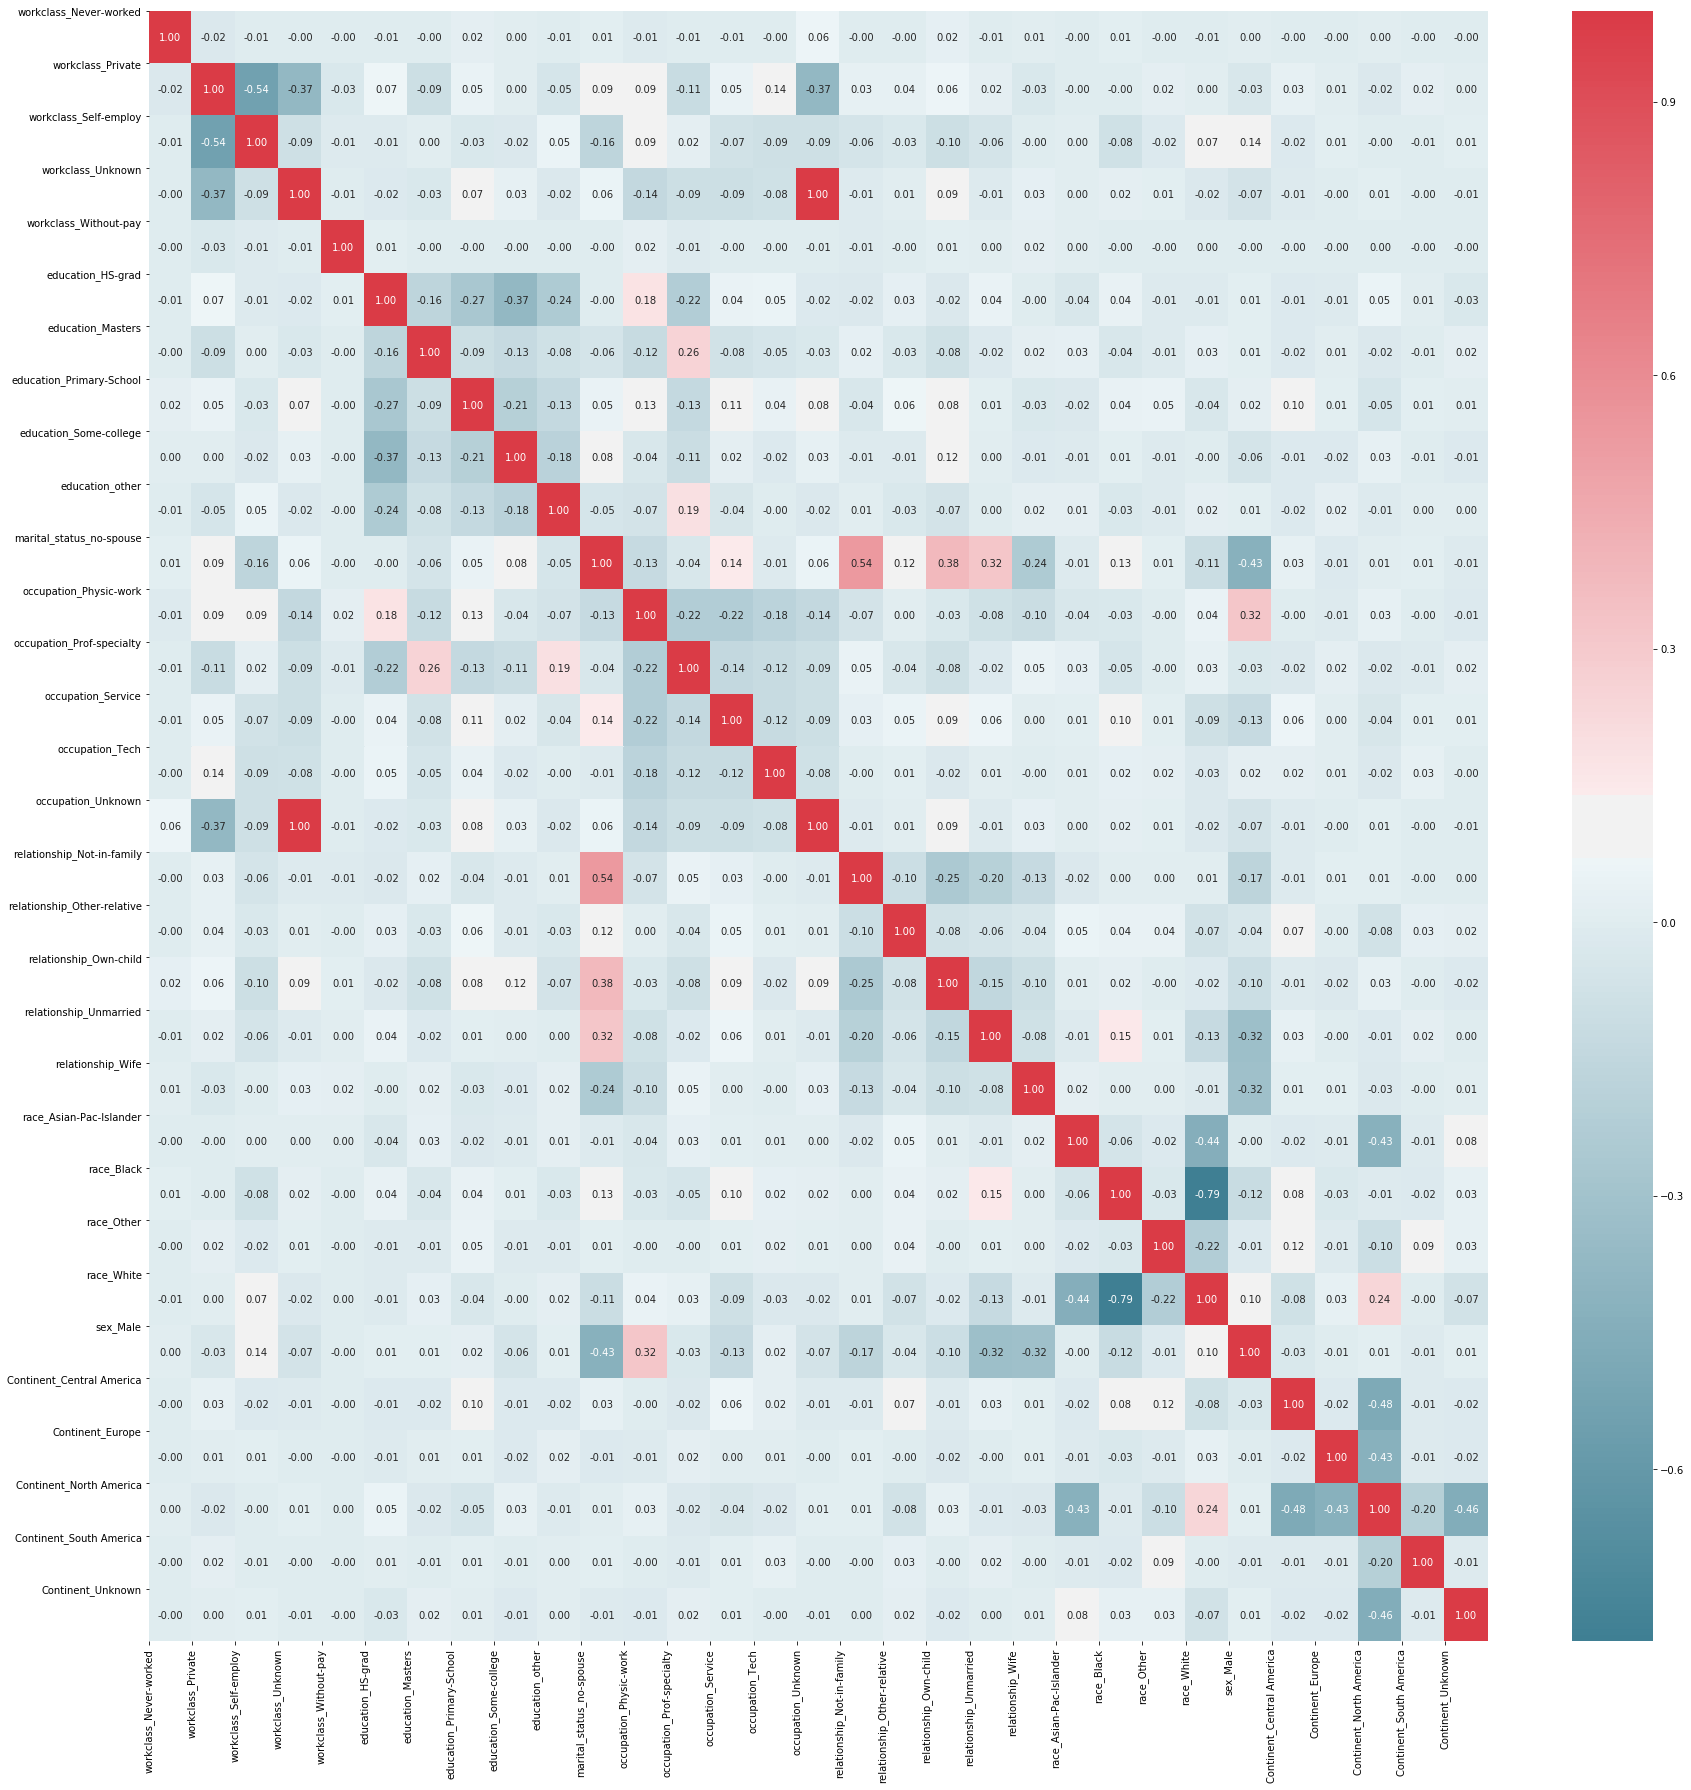

In [117]:
heatMap(train_data,True)

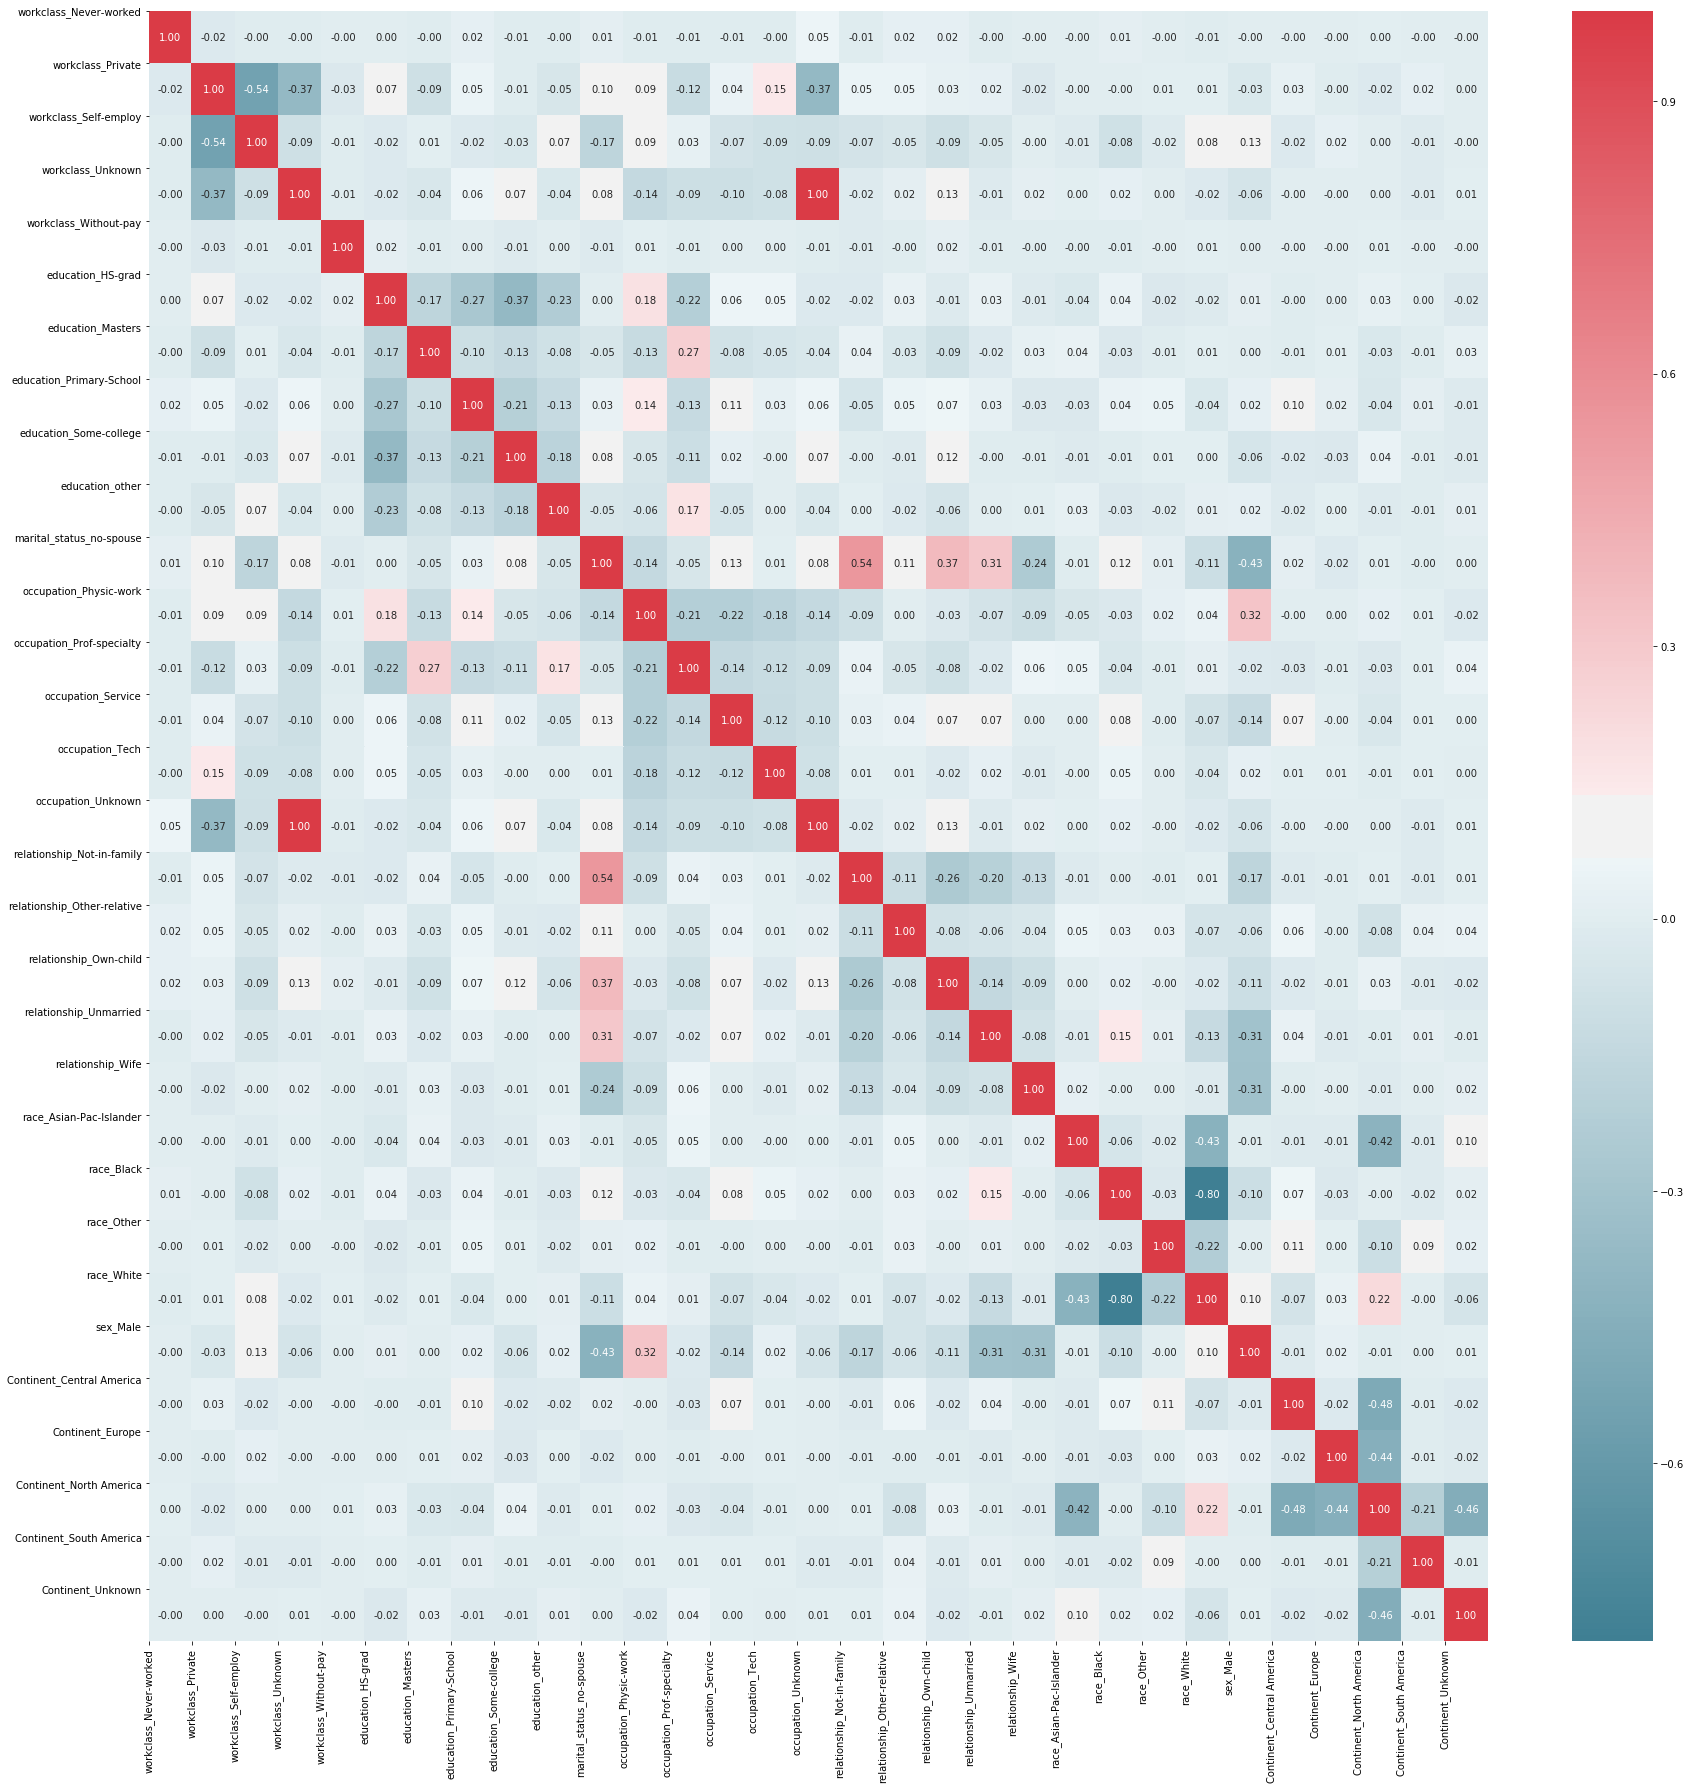

In [118]:
heatMap(test_data,True)

In [119]:
train_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,Capital_Loss_Bin,Hours_per_week_Bin
0,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,high,low,normal
1,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_high,low,low,low,low
2,<=50K,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,high,low,low,normal
3,<=50K,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,very_high,high,low,low,normal
4,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,very_low,high,low,low,normal


In [120]:
test_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,Capital_Loss_Bin,Hours_per_week_Bin
0,<=50K.,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,very_low,high,low,low,normal
1,<=50K.,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,low,low,hard
2,>50K.,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_low,high,low,low,normal
3,>50K.,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,high,medium,high,low,normal
4,<=50K.,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,very_low,low,low,low,low


In [121]:
Train_dummies_age_bin = pd.get_dummies(train_data.Age_Bin, drop_first=True, prefix='Age')
Train_dummies_fnlwgt_bin = pd.get_dummies(train_data.FnlWgt_Bin, drop_first=True, prefix='Fnlwgt')
Train_dummies_capital_gain_bin = pd.get_dummies(train_data.Capital_Gain_Bin, drop_first=True, prefix='Capital_gain')
Train_dummies_capital_loss_bin = pd.get_dummies(train_data.Capital_Loss_Bin, drop_first=True, prefix='Capital_loss')
Train_dummies_hours_per_week_bin = pd.get_dummies(train_data.Hours_per_week_Bin, drop_first=True, prefix='Hours_per_week')

In [122]:
train_data = train_data.join([Train_dummies_age_bin,Train_dummies_fnlwgt_bin,Train_dummies_capital_gain_bin,Train_dummies_capital_loss_bin,Train_dummies_hours_per_week_bin])


In [123]:
train_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,Capital_Loss_Bin,Hours_per_week_Bin,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_high,Capital_loss_high,Hours_per_week_low,Hours_per_week_normal,Hours_per_week_very hard
0,<=50K,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,high,low,normal,0,1,0,0,0,1,0,0,1,0
1,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_high,low,low,low,low,0,0,1,0,0,0,0,1,0,0
2,<=50K,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,high,low,low,normal,0,1,0,0,1,0,0,0,1,0
3,<=50K,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,very_high,high,low,low,normal,0,0,1,0,1,0,0,0,1,0
4,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,very_low,high,low,low,normal,0,0,0,0,1,0,0,0,1,0


In [124]:
train_data = train_data.drop(['FnlWgt_Bin','Capital_Gain_Bin','Capital_Loss_Bin','Hours_per_week_Bin','Age_Bin'],axis=1)

In [125]:
#train_data = train_data.drop(['age','fnlwgt','capital_gain','capital_loss','hours_per_week'],axis=1)

In [126]:
test_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_Bin,FnlWgt_Bin,Capital_Gain_Bin,Capital_Loss_Bin,Hours_per_week_Bin
0,<=50K.,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,very_low,high,low,low,normal
1,<=50K.,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,high,low,low,low,hard
2,>50K.,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,very_low,high,low,low,normal
3,>50K.,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,high,medium,high,low,normal
4,<=50K.,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,very_low,low,low,low,low


In [127]:
Test_dummies_age_bin = pd.get_dummies(test_data.Age_Bin, drop_first=True, prefix='Age')
Test_dummies_fnlwgt_bin = pd.get_dummies(test_data.FnlWgt_Bin, drop_first=True, prefix='Fnlwgt')
Test_dummies_capital_gain_bin = pd.get_dummies(test_data.Capital_Gain_Bin, drop_first=True, prefix='Capital_gain')
Test_dummies_capital_loss_bin = pd.get_dummies(test_data.Capital_Loss_Bin, drop_first=True, prefix='Capital_loss')
Test_dummies_hours_per_week_bin = pd.get_dummies(test_data.Hours_per_week_Bin, drop_first=True, prefix='Hours_per_week')

In [128]:
test_data = test_data.join([Test_dummies_age_bin,Test_dummies_fnlwgt_bin,Test_dummies_capital_gain_bin,Test_dummies_capital_loss_bin,Test_dummies_hours_per_week_bin])

In [129]:
test_data = test_data.drop(['FnlWgt_Bin','Capital_Gain_Bin','Capital_Loss_Bin','Hours_per_week_Bin','Age_Bin'],axis=1)

In [130]:
#train_data = train_data.drop(['Age_Bin'],axis=1)
#test_data = test_data.drop(['Age_Bin'],axis=1)

In [131]:
#test_data = test_data.drop(['age','fnlwgt','capital_gain','capital_loss','hours_per_week'],axis=1)

In [132]:
train_data['income_class'] = train_data['income_class'].map({'<=50K':0,'>50K':1})
test_data['income_class'] = test_data['income_class'].map({'<=50K.':0,'>50K.':1})

In [133]:
train_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_high,Capital_loss_high,Hours_per_week_low,Hours_per_week_normal,Hours_per_week_very hard
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [134]:
test_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_high,Capital_loss_high,Hours_per_week_low,Hours_per_week_normal,Hours_per_week_very hard
0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [135]:
train_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_high,Capital_loss_high,Hours_per_week_low,Hours_per_week_normal,Hours_per_week_very hard
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [136]:
TEST=test_data.copy()

In [137]:
TRAIN=train_data.copy()

In [138]:
train_data.head()

,income_class,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_high,Capital_loss_high,Hours_per_week_low,Hours_per_week_normal,Hours_per_week_very hard
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [139]:
y_Train = train_data.iloc[:,0]
X_Train = train_data.iloc[:,1:]

In [140]:
X_Train.head()

,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_high,Capital_loss_high,Hours_per_week_low,Hours_per_week_normal,Hours_per_week_very hard
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [141]:
y_Train.head()

0    0
1    0
2    0
3    0
4    0
Name: income_class, dtype: int64

In [142]:
y_Test = test_data.iloc[:,0]
X_Test = test_data.iloc[:,1:]

In [143]:
X_Test.head()

,workclass_Never-worked,workclass_Private,workclass_Self-employ,workclass_Unknown,workclass_Without-pay,education_HS-grad,education_Masters,education_Primary-School,education_Some-college,education_other,marital_status_no-spouse,occupation_Physic-work,occupation_Prof-specialty,occupation_Service,occupation_Tech,occupation_Unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,Continent_Central America,Continent_Europe,Continent_North America,Continent_South America,Continent_Unknown,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_high,Capital_loss_high,Hours_per_week_low,Hours_per_week_normal,Hours_per_week_very hard
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [144]:
y_Test.head()

0    0
1    0
2    1
3    1
4    0
Name: income_class, dtype: int64

In [145]:
# Write the function to extract the confusion matrix

In [146]:
from sklearn.metrics import confusion_matrix
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])


In [147]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# train the decision tree
dtree = DecisionTreeClassifier(criterion='gini', random_state=0)
dtree.fit(X_Train, y_Train)
predicted = dtree.predict(X_Test)

In [148]:
# how did my model perform?


## Take a look at the confusion matrix ([TN,FN],[FP,TP])
conf_matrix=confusion_matrix(y_Test, predicted)
print(conf_matrix)

TN, FP, FN, TP = get_confusion_matrix_values(y_Test, predicted)

total1=sum(sum(conf_matrix))

print("Total Test     = " , total1)
print('True positive  = ', TP )
print('False positive = ', FP)
print('False negative = ', FN )
print('True negative  = ', TN)



accuracy1 = 100 * (TP + TN ) / total1
print ('Accuracy                            : %0.2f - the proportion of the total number of predictions that were correct' %accuracy1)

sensitivity1 = 100 * TP / (TP + FN )
print('TPR/Sensitivity/Recall/Hit Rate     : %0.2f - the proportion of actual positive cases which are correctly identified' %sensitivity1 )

specificity1 = 100 * TN / (FP + TN)
print('Specificity                         : %0.2f - the proportion of actual negative cases which are correctly identified' %specificity1)

precision1 = 100 * TP / (TP + FP)
print('Precision/Positive Predictive Value : %0.2f - the proportion of positive cases that were correctly identified' %precision1)

negativepredvalue = 100 * TN / (FN + TN)
print('Negative Predictive Value           : %0.2f - the proportion of negative cases that were correctly identified' %negativepredvalue)

falsepositiveratevalue = 100 * FP / (FP + TN)
print('False Positive Rate(FPR)/Fall-out   : %0.2f - the proportion of negative data points that are mistakenly considered as positive' %falsepositiveratevalue)

Error = (FP + FN )/total1
print('Classification Error: {:.2f}'.format(Error))

[[11013  1422]
 [ 1837  2009]]
Total Test     =  16281
True positive  =  2009
False positive =  1422
False negative =  1837
True negative  =  11013
Accuracy                            : 79.98 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 52.24 - the proportion of actual positive cases which are correctly identified
Specificity                         : 88.56 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 58.55 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 85.70 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 11.44 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.20


In [149]:
# Use Random Forests to get an insight on Feature Importance

In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_Train, y_Train)
predicted = rf.predict(X_Test)
print(roc_auc_score(y_Test, predicted))

C:\Users\Jaideep\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7238190227247208


In [152]:
# how did my  model perform?

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
conf_matrix=confusion_matrix(y_Test, predicted)
print(conf_matrix)

TN, FP, FN, TP = get_confusion_matrix_values(y_Test, predicted)

total1=sum(sum(conf_matrix))

print("Total Test     = " , total1)
print('True positive  = ', TP )
print('False positive = ', FP)
print('False negative = ', FN )
print('True negative  = ', TN)



accuracy1 = 100 * (TP + TN ) / total1
print ('Accuracy                            : %0.2f - the proportion of the total number of predictions that were correct' %accuracy1)

sensitivity1 = 100 * TP / (TP + FN )
print('TPR/Sensitivity/Recall/Hit Rate     : %0.2f - the proportion of actual positive cases which are correctly identified' %sensitivity1 )

specificity1 = 100 * TN / (FP + TN)
print('Specificity                         : %0.2f - the proportion of actual negative cases which are correctly identified' %specificity1)

precision1 = 100 * TP / (TP + FP)
print('Precision/Positive Predictive Value : %0.2f - the proportion of positive cases that were correctly identified' %precision1)

negativepredvalue = 100 * TN / (FN + TN)
print('Negative Predictive Value           : %0.2f - the proportion of negative cases that were correctly identified' %negativepredvalue)

falsepositiveratevalue = 100 * FP / (FP + TN)
print('False Positive Rate(FPR)/Fall-out   : %0.2f - the proportion of negative data points that are mistakenly considered as positive' %falsepositiveratevalue)

Error = (FP + FN )/total1
print('Classification Error: {:.2f}'.format(Error))

[[11134  1301]
 [ 1722  2124]]
Total Test     =  16281
True positive  =  2124
False positive =  1301
False negative =  1722
True negative  =  11134
Accuracy                            : 81.43 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 55.23 - the proportion of actual positive cases which are correctly identified
Specificity                         : 89.54 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 62.01 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 86.61 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 10.46 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.19


In [153]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
features = train_data.iloc[:,1:]

feature_list = list(features.columns)



In [154]:
feature_list

['workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-employ',
 'workclass_Unknown',
 'workclass_Without-pay',
 'education_HS-grad',
 'education_Masters',
 'education_Primary-School',
 'education_Some-college',
 'education_other',
 'marital_status_no-spouse',
 'occupation_Physic-work',
 'occupation_Prof-specialty',
 'occupation_Service',
 'occupation_Tech',
 'occupation_Unknown',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_Male',
 'Continent_Central America',
 'Continent_Europe',
 'Continent_North America',
 'Continent_South America',
 'Continent_Unknown',
 'Age_low',
 'Age_high',
 'Age_very_high',
 'Fnlwgt_medium',
 'Fnlwgt_high',
 'Capital_gain_high',
 'Capital_loss_high',
 'Hours_per_week_low',
 'Hours_per_week_normal',
 'Hours_per_week_very hard']

In [155]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

In [156]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [157]:
# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances]
print("______________________________________________________")

Variable: marital_status_no-spouse       Importance: 0.17566
Variable: Fnlwgt_medium                  Importance: 0.04353
Variable: Fnlwgt_high                    Importance: 0.04268
Variable: Capital_loss_high              Importance: 0.04235
Variable: education_HS-grad              Importance: 0.03943
Variable: Hours_per_week_normal          Importance: 0.03916
Variable: education_Primary-School       Importance: 0.03814
Variable: occupation_Physic-work         Importance: 0.03648
Variable: workclass_Private              Importance: 0.03582
Variable: Capital_gain_high              Importance: 0.03538
Variable: relationship_Own-child         Importance: 0.03512
Variable: relationship_Not-in-family     Importance: 0.03443
Variable: Hours_per_week_low             Importance: 0.03063
Variable: occupation_Prof-specialty      Importance: 0.03045
Variable: Age_very_high                  Importance: 0.02937
Variable: Age_high                       Importance: 0.02831
Variable: education_Some

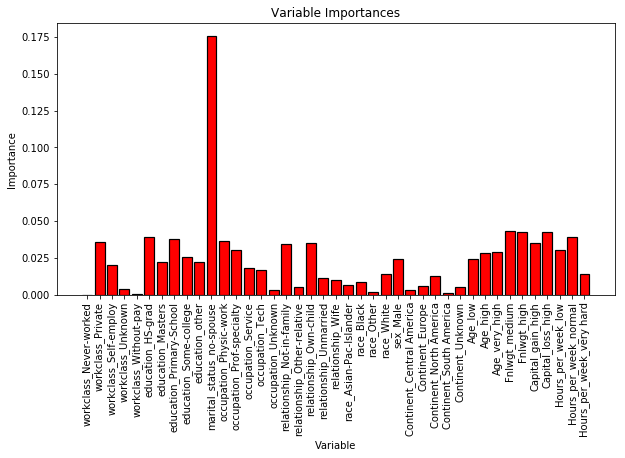

In [158]:
# list of x locations for plotting
plt.figure(figsize=(10,5))
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


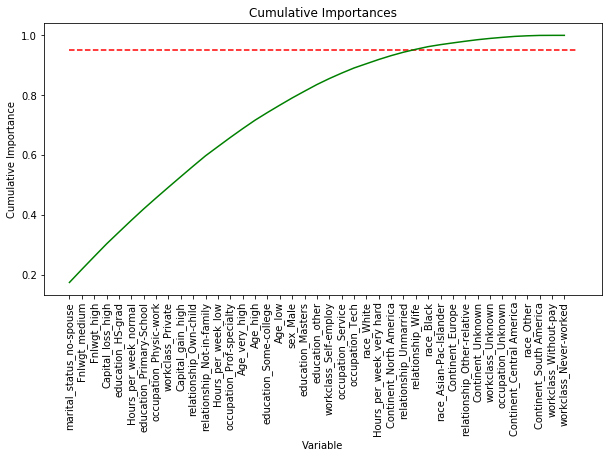

In [159]:
plt.figure(figsize=(10,5))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [160]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 29


In [161]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:29]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

In [162]:
important_feature_names

['marital_status_no-spouse',
 'Fnlwgt_medium',
 'Fnlwgt_high',
 'Capital_loss_high',
 'education_HS-grad',
 'Hours_per_week_normal',
 'education_Primary-School',
 'occupation_Physic-work',
 'workclass_Private',
 'Capital_gain_high',
 'relationship_Own-child',
 'relationship_Not-in-family',
 'Hours_per_week_low',
 'occupation_Prof-specialty',
 'Age_very_high',
 'Age_high',
 'education_Some-college',
 'Age_low',
 'sex_Male',
 'education_Masters',
 'education_other',
 'workclass_Self-employ',
 'occupation_Service',
 'occupation_Tech',
 'race_White',
 'Hours_per_week_very hard',
 'Continent_North America',
 'relationship_Unmarried',
 'relationship_Wife']

In [163]:
X_Train.iloc[:,important_indices].head()

,marital_status_no-spouse,Fnlwgt_medium,Fnlwgt_high,Capital_loss_high,education_HS-grad,Hours_per_week_normal,education_Primary-School,occupation_Physic-work,workclass_Private,Capital_gain_high,relationship_Own-child,relationship_Not-in-family,Hours_per_week_low,occupation_Prof-specialty,Age_very_high,Age_high,education_Some-college,Age_low,sex_Male,education_Masters,education_other,workclass_Self-employ,occupation_Service,occupation_Tech,race_White,Hours_per_week_very hard,Continent_North America,relationship_Unmarried,relationship_Wife
0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
2,1,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [164]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:29]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = X_Train.iloc[:,important_indices]
important_test_features = X_Test.iloc[:,important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (32561, 29)
Important test features shape: (16281, 29)


In [165]:
# RANDOM FOREST _ REVISED 

# Train the expanded model on only the important features
rf1 = RandomForestClassifier(random_state=1)
rf1.fit(important_train_features, y_Train);

# Make predictions on test data
predicted = rf1.predict(important_test_features)

print(roc_auc_score(y_Test, predicted))


C:\Users\Jaideep\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7217228809779652


In [166]:
# Define the model score calculation function
def Perform_Model_Score_Calculation():
    # how did my model perform?
    ## Take a look at the confusion matrix ([TN,FN],[FP,TP])
    conf_matrix=confusion_matrix(y_Test, predicted)
    print(conf_matrix)

    TN, FP, FN, TP = get_confusion_matrix_values(y_Test, predicted)

    total1=sum(sum(conf_matrix))

    print("Total Test     = " , total1)
    print('True positive  = ', TP )
    print('False positive = ', FP)
    print('False negative = ', FN )
    print('True negative  = ', TN)



    accuracy1 = 100 * (TP + TN ) / total1
    print ('Accuracy                            : %0.2f - the proportion of the total number of predictions that were correct' %accuracy1)

    sensitivity1 = 100 * TP / (TP + FN )
    print('TPR/Sensitivity/Recall/Hit Rate     : %0.2f - the proportion of actual positive cases which are correctly identified' %sensitivity1 )

    specificity1 = 100 * TN / (FP + TN)
    print('Specificity                         : %0.2f - the proportion of actual negative cases which are correctly identified' %specificity1)

    precision1 = 100 * TP / (TP + FP)
    print('Precision/Positive Predictive Value : %0.2f - the proportion of positive cases that were correctly identified' %precision1)

    negativepredvalue = 100 * TN / (FN + TN)
    print('Negative Predictive Value           : %0.2f - the proportion of negative cases that were correctly identified' %negativepredvalue)

    falsepositiveratevalue = 100 * FP / (FP + TN)
    print('False Positive Rate(FPR)/Fall-out   : %0.2f - the proportion of negative data points that are mistakenly considered as positive' %falsepositiveratevalue)

    Error = (FP + FN )/total1
    print('Classification Error: {:.2f}'.format(Error))
    print('F1 Score            : {:.2f}'.format(f1_score(y_Test, predicted)))


    report = classification_report(y_Test, predicted)
    print(report)
    return


# 1. Decision Tree Classifier

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# train the decision tree
dtc = DecisionTreeClassifier(criterion='gini', random_state=0)
dtc.fit(X_Train, y_Train)
predicted = dtc.predict(X_Test)
print("Accuracy using Decision Tree classifier is  ", metrics.accuracy_score(y_Test,predicted)*100)

Accuracy using Decision Tree classifier is   79.98280203918678


In [168]:
Perform_Model_Score_Calculation()

[[11013  1422]
 [ 1837  2009]]
Total Test     =  16281
True positive  =  2009
False positive =  1422
False negative =  1837
True negative  =  11013
Accuracy                            : 79.98 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 52.24 - the proportion of actual positive cases which are correctly identified
Specificity                         : 88.56 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 58.55 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 85.70 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 11.44 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.20
F1 Score            : 0.55
              precision    recall  f1-score   support

           0       0.86      0.89      0.87    

# 2. Random Forest Classifier

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_Train, y_Train)
predicted = rf.predict(X_Test)
print(roc_auc_score(y_Test, predicted))

C:\Users\Jaideep\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7238190227247208


In [170]:
print("Accuracy using Random Forest Classifier is  ", metrics.accuracy_score(y_Test,predicted)*100)

Accuracy using Random Forest Classifier is   81.43234445058657


In [171]:
Perform_Model_Score_Calculation()

[[11134  1301]
 [ 1722  2124]]
Total Test     =  16281
True positive  =  2124
False positive =  1301
False negative =  1722
True negative  =  11134
Accuracy                            : 81.43 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 55.23 - the proportion of actual positive cases which are correctly identified
Specificity                         : 89.54 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 62.01 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 86.61 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 10.46 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.19
F1 Score            : 0.58
              precision    recall  f1-score   support

           0       0.87      0.90      0.88    

# 3.BaggingClassifier

In [172]:

# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5), n_estimators=20, max_samples=0.5, bootstrap=True, random_state=3) 
bag_knn.fit(X_Train, y_Train)
predicted = bag_knn.predict(X_Test)
print("Accuracy using BaggingClassifier is  ", metrics.accuracy_score(y_Test,predicted)*100)

Accuracy using BaggingClassifier is   82.9248817640194


In [173]:
Perform_Model_Score_Calculation()

[[11332  1103]
 [ 1677  2169]]
Total Test     =  16281
True positive  =  2169
False positive =  1103
False negative =  1677
True negative  =  11332
Accuracy                            : 82.92 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 56.40 - the proportion of actual positive cases which are correctly identified
Specificity                         : 91.13 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 66.29 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 87.11 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 8.87 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.17
F1 Score            : 0.61
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     

The Accuracy using Bagging Classifier is 82.92%

# 4.XG BOOST

In [174]:
import sklearn.metrics as metrics
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X_Train,label=y_Train)
xg_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
xg_class.fit(X_Train,y_Train)
predicted = xg_class.predict(X_Test)
accuracy = metrics.accuracy_score(y_Test, predicted)
print("Accuracy using XGBoost is %.2f%%" % (accuracy * 100.0))

Accuracy using XGBoost is 83.81%


In [175]:
Perform_Model_Score_Calculation()

[[11548   887]
 [ 1749  2097]]
Total Test     =  16281
True positive  =  2097
False positive =  887
False negative =  1749
True negative  =  11548
Accuracy                            : 83.81 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 54.52 - the proportion of actual positive cases which are correctly identified
Specificity                         : 92.87 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 70.27 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 86.85 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 7.13 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.16
F1 Score            : 0.61
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     1

# 5.Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
lr = LogisticRegression()
lrm = lr.fit(X_Train, y_Train)
predicted = lr.predict(X_Test)
# check accuracy score on Test dataset
print("Accuracy using Logistic Regression is ", metrics.accuracy_score(y_Test, predicted)*100,"%")


C:\Users\Jaideep\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy using Logistic Regression is  83.50838400589645 %


In [177]:
Perform_Model_Score_Calculation()

[[11420  1015]
 [ 1670  2176]]
Total Test     =  16281
True positive  =  2176
False positive =  1015
False negative =  1670
True negative  =  11420
Accuracy                            : 83.51 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 56.58 - the proportion of actual positive cases which are correctly identified
Specificity                         : 91.84 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 68.19 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 87.24 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 8.16 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.16
F1 Score            : 0.62
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     

# 6.Naive Bayes Classifier

In [178]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_Train,y_Train)
predicted = NB.predict(X_Test)
print("Accuracy is ", metrics.accuracy_score(y_Test, predicted)*100,"%")

Accuracy is  53.04956697991524 %


In [179]:
#Accuracy of 53.05% is very low given by Naive Bayes

In [180]:
Perform_Model_Score_Calculation()

[[4981 7454]
 [ 190 3656]]
Total Test     =  16281
True positive  =  3656
False positive =  7454
False negative =  190
True negative  =  4981
Accuracy                            : 53.05 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 95.06 - the proportion of actual positive cases which are correctly identified
Specificity                         : 40.06 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 32.91 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 96.33 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 59.94 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.47
F1 Score            : 0.49
              precision    recall  f1-score   support

           0       0.96      0.40      0.57     12435

# 7.K-Nearest Neighbour Classifier

In [181]:
from sklearn.neighbors import KNeighborsClassifier
for K in range(30):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_Train, y_Train) 
    predicted = neigh.predict(X_Test)
    print("Accuracy is ", metrics.accuracy_score(y_Test,predicted)*100,"% for K-Value:",K_value)

Accuracy is  78.26300595786499 % for K-Value: 1
Accuracy is  80.22848719366132 % for K-Value: 2
Accuracy is  80.81813156440022 % for K-Value: 3
Accuracy is  82.04655733677293 % for K-Value: 4
Accuracy is  81.8315828266077 % for K-Value: 5
Accuracy is  82.39665868189915 % for K-Value: 6
Accuracy is  82.39665868189915 % for K-Value: 7
Accuracy is  82.64234383637368 % for K-Value: 8
Accuracy is  82.56249616116946 % for K-Value: 9
Accuracy is  82.6914808672686 % for K-Value: 10
Accuracy is  82.6914808672686 % for K-Value: 11
Accuracy is  82.76518641361096 % for K-Value: 12
Accuracy is  82.75290215588723 % for K-Value: 13
Accuracy is  82.71604938271605 % for K-Value: 14
Accuracy is  82.7406178981635 % for K-Value: 15
Accuracy is  82.85117621767705 % for K-Value: 16
Accuracy is  82.8941711197101 % for K-Value: 17
Accuracy is  83.0292979546711 % for K-Value: 18
Accuracy is  83.06615072784227 % for K-Value: 19
Accuracy is  83.11528775873718 % for K-Value: 20
Accuracy is  83.07229285670414 % fo

In [182]:
# The Best value for k=30 gives an accuracy of 83.21%

In [183]:
Perform_Model_Score_Calculation()

[[11488   947]
 [ 1786  2060]]
Total Test     =  16281
True positive  =  2060
False positive =  947
False negative =  1786
True negative  =  11488
Accuracy                            : 83.21 - the proportion of the total number of predictions that were correct
TPR/Sensitivity/Recall/Hit Rate     : 53.56 - the proportion of actual positive cases which are correctly identified
Specificity                         : 92.38 - the proportion of actual negative cases which are correctly identified
Precision/Positive Predictive Value : 68.51 - the proportion of positive cases that were correctly identified
Negative Predictive Value           : 86.55 - the proportion of negative cases that were correctly identified
False Positive Rate(FPR)/Fall-out   : 7.62 - the proportion of negative data points that are mistakenly considered as positive
Classification Error: 0.17
F1 Score            : 0.60
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     1

# From the above 7 models we can infer that the XG Boost model is the best with an accuracy of 83.81% as compared to other models

#The F1-score reveals weighted average between precision and recall which means if the value approaches 1 it's infered as a good score.